# Business Problem
#### Business Objective : An education company named X Education sells online courses to industry professionals.Now, although X Education gets a lot of leads, its lead conversion rate is very poor. The objective of the model is to identify High potential leads from regular leads and help achieve a conversion rate of 80%

# reading the data 

In [79]:
# importing imp libraries
import pandas as pd 
import seaborn as sns 
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve       
from sklearn.metrics import roc_auc_score
import statsmodels.api as sm
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import metrics
import warnings 
warnings.filterwarnings('ignore')

In [2]:
# reading the csv file 
df=pd.read_csv('leads.csv')
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [3]:
df.shape

(9240, 37)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [5]:
df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


# Cleaning the data

In [6]:
# dropping some usless columns
df=df.drop(['Prospect ID','Lead Number','Country','I agree to pay the amount through cheque','A free copy of Mastering The Interview','City','Magazine','Receive More Updates About Our Courses','Get updates on DM Content','Update me on Supply Chain Content'],1)

In [7]:
df.shape

(9240, 27)

In [8]:
# replacing 'selet' with NaN
df=df.replace('Select', np.nan)
df=df.replace('select', np.nan)
df.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,...,Digital Advertisement,Through Recommendations,Tags,Lead Quality,Lead Profile,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,...,No,No,Interested in other courses,Low in Relevance,NaN,02.Medium,02.Medium,15.0,15.0,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,NaN,...,No,No,Ringing,NaN,NaN,02.Medium,02.Medium,15.0,15.0,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,Business Administration,...,No,No,Will revert after reading the email,Might be,Potential Lead,02.Medium,01.High,14.0,20.0,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,Media and Advertising,...,No,No,Ringing,Not Sure,NaN,02.Medium,01.High,13.0,17.0,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,NaN,...,No,No,Will revert after reading the email,Might be,NaN,02.Medium,01.High,15.0,18.0,Modified


In [9]:
round(df.isnull().sum()/len(df)*100,2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Advertisement                             0.00
Through Re

In [10]:
# removing columns with more than 35% null value
df=df.drop(df.columns[df.isnull().mean()>0.35],axis=1)
df.shape

(9240, 18)

In [11]:
df.isnull().sum()

Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Newspaper Article                                   0
X Education Forums                                  0
Newspaper                                           0
Digital Advertisement                               0
Through Recommendations                             0
Last Notable Activity                               0
dtype: int64

In [12]:
# imputing missing value with most occuring value in each column
df['Lead Source'].value_counts()

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64

In [13]:
df['TotalVisits'].value_counts()

0.0      2189
2.0      1680
3.0      1306
4.0      1120
5.0       783
6.0       466
1.0       395
7.0       309
8.0       224
9.0       164
10.0      114
11.0       86
13.0       48
12.0       45
14.0       36
16.0       21
15.0       18
17.0       16
18.0       15
20.0       12
19.0        9
21.0        6
23.0        6
24.0        5
25.0        5
27.0        5
22.0        3
29.0        2
28.0        2
26.0        2
141.0       1
55.0        1
30.0        1
43.0        1
74.0        1
41.0        1
54.0        1
115.0       1
251.0       1
32.0        1
42.0        1
Name: TotalVisits, dtype: int64

In [14]:
df['Page Views Per Visit'].value_counts()

0.00    2189
2.00    1795
3.00    1196
4.00     896
1.00     651
        ... 
3.43       1
2.56       1
6.33       1
1.64       1
2.08       1
Name: Page Views Per Visit, Length: 114, dtype: int64

In [15]:
df['Last Activity'].value_counts()

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

In [16]:
df['What is your current occupation'].value_counts()

Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [17]:
df['What matters most to you in choosing a course'].value_counts()

Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [18]:
imputing_values={'Lead Source':'Google','TotalVisits':'0.0','Page Views Per Visit':'0.0','Last Activity':'Email Opened',
               'What is your current occupation':'Unemployed','What matters most to you in choosing a course':'Better Career Prospects'}

df=df.fillna(value=imputing_values)

In [19]:
df.isnull().sum()

Lead Origin                                      0
Lead Source                                      0
Do Not Email                                     0
Do Not Call                                      0
Converted                                        0
TotalVisits                                      0
Total Time Spent on Website                      0
Page Views Per Visit                             0
Last Activity                                    0
What is your current occupation                  0
What matters most to you in choosing a course    0
Search                                           0
Newspaper Article                                0
X Education Forums                               0
Newspaper                                        0
Digital Advertisement                            0
Through Recommendations                          0
Last Notable Activity                            0
dtype: int64

# Data transorming

### changing 'Yes' to 1 and 'No' to 0

In [20]:
# Yes : 1 , No : 0

category={"No":0,"Yes":1}    # creating dictionary for two categories

# Column 'Do Not Email'

df['Do Not Email']=df['Do Not Email'].map(category)

# Column 'Do Not Call'

df['Do Not Call']=df['Do Not Call'].map(category)

# Column 'Search'

df['Search']=df['Search'].map(category)

# Column 'Newspaper Article'

df['Newspaper Article']=df['Newspaper Article'].map(category)

# Column 'X Education Forums'

df['X Education Forums']=df['X Education Forums'].map(category)

# Column 'Newspaper'

df['Newspaper']=df['Newspaper'].map(category)

# Column 'Digital Advertisement'

df['Digital Advertisement']=df['Digital Advertisement'].map(category)

# Column 'Through Recommendations'

df['Through Recommendations']=df['Through Recommendations'].map(category)

In [21]:
df.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,What is your current occupation,What matters most to you in choosing a course,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Last Notable Activity
0,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,Unemployed,Better Career Prospects,0,0,0,0,0,0,Modified
1,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,Unemployed,Better Career Prospects,0,0,0,0,0,0,Email Opened
2,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,Student,Better Career Prospects,0,0,0,0,0,0,Email Opened
3,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,Unemployed,Better Career Prospects,0,0,0,0,0,0,Modified
4,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,Unemployed,Better Career Prospects,0,0,0,0,0,0,Modified


In [22]:
# creating dummy variables 
dummy=pd.get_dummies(df[['Lead Origin','Lead Source','Last Activity','What is your current occupation',
                             'What matters most to you in choosing a course','Last Notable Activity']],drop_first=True)


In [23]:
df=pd.concat([df,dummy],axis=1)

df.shape


(9240, 80)

In [24]:
# removing duplicate columns
duplicates=['Lead Origin','Lead Source','Last Activity','What is your current occupation',
            'What matters most to you in choosing a course','Last Notable Activity']


df=df.drop(duplicates,1)

df.shape


(9240, 74)

# test-train split

In [25]:
# adding target variable 'converted' to y
y=df['Converted']
y.head

<bound method NDFrame.head of 0       0
1       0
2       1
3       0
4       1
       ..
9235    1
9236    0
9237    0
9238    1
9239    1
Name: Converted, Length: 9240, dtype: int64>

In [26]:
# adding dependent variable in X
X=df.drop('Converted',1)
X.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0.0,0,0.0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,5.0,674,2.5,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,2.0,1532,2.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1.0,305,1.0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,0,2.0,1428,1.0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [27]:
# splitting data frame in 70% and 30% for train and test
X_train,X_test,y_train,y_test=train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [28]:
scaler = MinMaxScaler()
X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.fit_transform(X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])
X_train.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
1871,0,0,0.000000,0.000000,0.000000,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6795,0,0,0.015936,0.214349,0.024182,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3516,0,0,0.019920,0.046655,0.045455,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8105,0,0,0.019920,0.541373,0.090909,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3934,0,0,0.000000,0.000000,0.000000,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


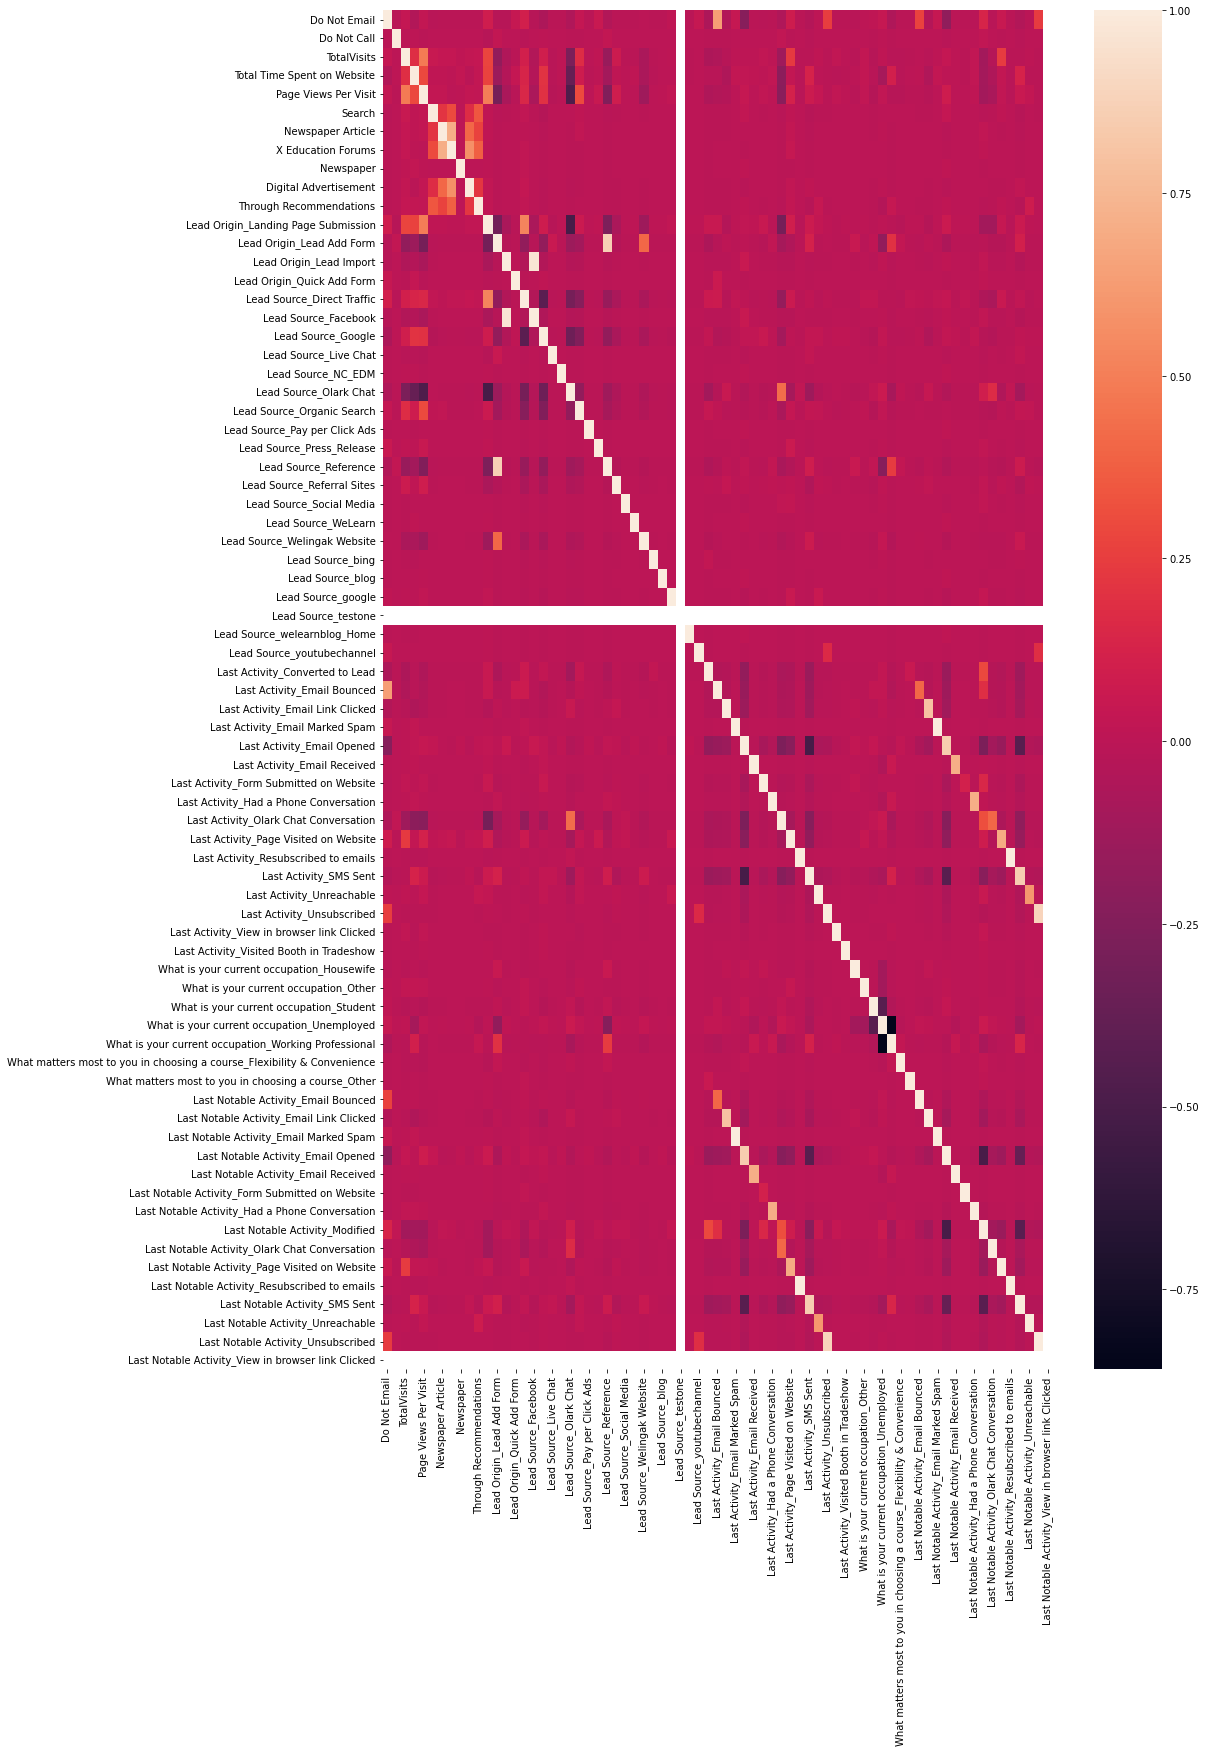

In [29]:
# checking coorelation 
plt.figure(figsize=(15,25))
sns.heatmap(X_train.corr())
plt.show()

# model building

In [32]:
help(RFE)

Help on class RFE in module sklearn.feature_selection._rfe:

class RFE(sklearn.feature_selection._base.SelectorMixin, sklearn.base.MetaEstimatorMixin, sklearn.base.BaseEstimator)
 |  RFE(estimator, *, n_features_to_select=None, step=1, verbose=0, importance_getter='auto')
 |  
 |  Feature ranking with recursive feature elimination.
 |  
 |  Given an external estimator that assigns weights to features (e.g., the
 |  coefficients of a linear model), the goal of recursive feature elimination
 |  (RFE) is to select features by recursively considering smaller and smaller
 |  sets of features. First, the estimator is trained on the initial set of
 |  features and the importance of each feature is obtained either through
 |  any specific attribute or callable.
 |  Then, the least important features are pruned from current set of features.
 |  That procedure is recursively repeated on the pruned set until the desired
 |  number of features to select is eventually reached.
 |  
 |  Read more in

In [33]:
# running rfe on 15 variables
logreg = LogisticRegression()
rfe = RFE(logreg, n_features_to_select =15)
rfe = rfe.fit(X_train, y_train)

In [34]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('Do Not Call', False, 9),
 ('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 4),
 ('Search', False, 30),
 ('Newspaper Article', False, 21),
 ('X Education Forums', False, 42),
 ('Newspaper', False, 8),
 ('Digital Advertisement', False, 5),
 ('Through Recommendations', False, 25),
 ('Lead Origin_Landing Page Submission', False, 43),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 54),
 ('Lead Origin_Quick Add Form', False, 18),
 ('Lead Source_Direct Traffic', False, 26),
 ('Lead Source_Facebook', False, 34),
 ('Lead Source_Google', False, 37),
 ('Lead Source_Live Chat', False, 48),
 ('Lead Source_NC_EDM', False, 20),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 36),
 ('Lead Source_Pay per Click Ads', False, 46),
 ('Lead Source_Press_Release', False, 41),
 ('Lead Source_Reference', False, 6),
 ('Lead Source_Referral Sites', False, 35),
 ('Lead Sou

In [35]:
# adding selected rfe varible in col
col = X_train.columns[rfe.support_]

In [36]:
# creaing LMR
X_train = X_train[col]
X_train_sm = sm.add_constant(X_train)
logm1 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6452
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2694.0
Date:                Mon, 14 Nov 2022   Deviance:                       5388.0
Time:                        09:23:34   Pearson chi2:                 7.10e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3912
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.0167      0.088    -11.563      0.000      -1.189      -0.844
Do Not Email                                            -1.6420      0.170     -9.670      0.000      -1.975      -1.309
TotalVisits                                              7.9288      2.080      3.813      0.000       3.853      12.005
Total Time Spent on Website                              4.5393      0.163     27.778      0.000       4.219       4.860
Lead Origin_Lead Add Form                                3.9203      0.194     20.236      0.000       3.541       4.300
Lead Source_Olark Chat                                   1.2908      0.108     11.936      0.000       1.079       1.503
Lead Source_Welingak Website                             2.0167      0.746      2.703      0.007       0.554       3.479
Last Activity_Olark Chat Conversation                   -1.0772      0.192     -5.606      0.000      -1.454      -0.701
What is your current occupation_Housewife               23.0149   1.37e+04      0.002      0.999   -2.68e+04    2.68e+04
What is your current occupation_Working Professional     2.7672      0.187     14.833      0.000       2.402       3.133
Last Notable Activity_Email Link Clicked                -1.9187      0.272     -7.060      0.000      -2.451      -1.386
Last Notable Activity_Email Opened                      -1.3344      0.087    -15.369      0.000      -1.505      -1.164
Last Notable Activity_Had a Phone Conversation           2.0236      1.099      1.842      0.065      -0.130       4.177
Last Notable Activity_Modified                          -1.8400      0.095    -19.322      0.000      -2.027      -1.653
Last Notable Activity_Olark Chat Conversation           -1.6354      0.376     -4.345      0.000      -2.373      -0.898
Last Notable Activity_Page Visited on Website           -1.7783      0.201     -8.851      0.000      -2.172      -1.385
========================================================================================================================
"""

In [37]:
# Make a VIF dataframe for all the variables present
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,Last Activity_Olark Chat Conversation,1.89
12,Last Notable Activity_Modified,1.84
2,Total Time Spent on Website,1.65
4,Lead Source_Olark Chat,1.60
1,TotalVisits,1.57
10,Last Notable Activity_Email Opened,1.45
3,Lead Origin_Lead Add Form,1.40
13,Last Notable Activity_Olark Chat Conversation,1.33
5,Lead Source_Welingak Website,1.24
8,What is your current occupation_Working Profes...,1.17


In [38]:
# removing variable 'What is your current occupation_Housewife'
X_train.drop('What is your current occupation_Housewife', axis = 1, inplace = True)

In [39]:
X_train_sm = sm.add_constant(X_train)
logm2 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6453
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2701.5
Date:                Mon, 14 Nov 2022   Deviance:                       5403.0
Time:                        09:23:35   Pearson chi2:                 7.13e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3898
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.0131      0.088    -11.535      0.000      -1.185      -0.841
Do Not Email                                            -1.6458      0.170     -9.693      0.000      -1.979      -1.313
TotalVisits                                              7.8446      2.073      3.784      0.000       3.781      11.908
Total Time Spent on Website                              4.5351      0.163     27.788      0.000       4.215       4.855
Lead Origin_Lead Add Form                                3.9350      0.193     20.356      0.000       3.556       4.314
Lead Source_Olark Chat                                   1.2829      0.108     11.881      0.000       1.071       1.495
Lead Source_Welingak Website                             1.9931      0.746      2.672      0.008       0.531       3.455
Last Activity_Olark Chat Conversation                   -1.0825      0.192     -5.636      0.000      -1.459      -0.706
What is your current occupation_Working Professional     2.7607      0.187     14.801      0.000       2.395       3.126
Last Notable Activity_Email Link Clicked                -1.9001      0.269     -7.057      0.000      -2.428      -1.372
Last Notable Activity_Email Opened                      -1.3279      0.087    -15.309      0.000      -1.498      -1.158
Last Notable Activity_Had a Phone Conversation           2.0230      1.098      1.842      0.066      -0.130       4.176
Last Notable Activity_Modified                          -1.8318      0.095    -19.266      0.000      -2.018      -1.645
Last Notable Activity_Olark Chat Conversation           -1.6264      0.376     -4.323      0.000      -2.364      -0.889
Last Notable Activity_Page Visited on Website           -1.7758      0.201     -8.842      0.000      -2.169      -1.382
========================================================================================================================
"""

In [40]:
# Make a VIF dataframe for all the variables present
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,Last Activity_Olark Chat Conversation,1.89
11,Last Notable Activity_Modified,1.84
2,Total Time Spent on Website,1.65
4,Lead Source_Olark Chat,1.60
1,TotalVisits,1.57
9,Last Notable Activity_Email Opened,1.45
3,Lead Origin_Lead Add Form,1.39
12,Last Notable Activity_Olark Chat Conversation,1.33
5,Lead Source_Welingak Website,1.23
7,What is your current occupation_Working Profes...,1.16


In [41]:
# removing variable 'Last Notable Activity_Had a Phone Conversation'
X_train.drop('Last Notable Activity_Had a Phone Conversation', axis = 1, inplace = True)

In [42]:
X_train_sm = sm.add_constant(X_train)
logm3 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6454
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2704.0
Date:                Mon, 14 Nov 2022   Deviance:                       5407.9
Time:                        09:23:35   Pearson chi2:                 7.13e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3894
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.0006      0.088    -11.418      0.000      -1.172      -0.829
Do Not Email                                            -1.6531      0.170     -9.735      0.000      -1.986      -1.320
TotalVisits                                              7.9900      2.077      3.847      0.000       3.919      12.061
Total Time Spent on Website                              4.5259      0.163     27.766      0.000       4.206       4.845
Lead Origin_Lead Add Form                                3.9325      0.193     20.339      0.000       3.554       4.311
Lead Source_Olark Chat                                   1.2789      0.108     11.844      0.000       1.067       1.490
Lead Source_Welingak Website                             1.9930      0.746      2.671      0.008       0.531       3.455
Last Activity_Olark Chat Conversation                   -1.0813      0.192     -5.630      0.000      -1.458      -0.705
What is your current occupation_Working Professional     2.7593      0.187     14.795      0.000       2.394       3.125
Last Notable Activity_Email Link Clicked                -1.9109      0.269     -7.099      0.000      -2.438      -1.383
Last Notable Activity_Email Opened                      -1.3393      0.087    -15.466      0.000      -1.509      -1.170
Last Notable Activity_Modified                          -1.8422      0.095    -19.399      0.000      -2.028      -1.656
Last Notable Activity_Olark Chat Conversation           -1.6369      0.376     -4.352      0.000      -2.374      -0.900
Last Notable Activity_Page Visited on Website           -1.7902      0.201     -8.918      0.000      -2.184      -1.397
========================================================================================================================
"""

In [43]:
# Make a VIF dataframe for all the variables present
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,Last Activity_Olark Chat Conversation,1.89
10,Last Notable Activity_Modified,1.84
2,Total Time Spent on Website,1.65
4,Lead Source_Olark Chat,1.60
1,TotalVisits,1.57
9,Last Notable Activity_Email Opened,1.45
3,Lead Origin_Lead Add Form,1.39
11,Last Notable Activity_Olark Chat Conversation,1.33
5,Lead Source_Welingak Website,1.23
7,What is your current occupation_Working Profes...,1.16


# predicting the train model

In [44]:
# Predicting the train dataset with our final model - rfe with 15 variables

y_train_pred=res.predict(X_train_sm)

# Creating a new dataset and saving predicted values in it

y_train_pred_final=pd.DataFrame({'Converted':y_train.values,'Converted_probability':y_train_pred,'ID':y_train.index})

y_train_pred_final.head() 

,Converted,Converted_probability,ID
1871,0,0.257111,1871
6795,0,0.224006,6795
3516,0,0.333872,3516
8105,0,0.833230,8105
3934,0,0.173075,3934


# ROC Curve

In [45]:
# Creating a function to plot roc curve with auc score

def edu_roc( real, probability ):
    
    # Creating roc curve values like false positive rate , true positive rate and threshold
    
    fpr, tpr, thresholds = roc_curve( real, probability,drop_intermediate = False )   
    
    # Calculating the auc score(area under the curve)
    
    auc_score = roc_auc_score( real, probability )    
    
    # Setting the figure size
    
    plt.figure(figsize=(8, 4))
    
    # Plotting the roc curve
    
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    
    # Plotting the 45% dotted line 
    plt.plot([0, 1], [0, 1], 'r--')
    
    # Setting the x axis linit
    
    plt.xlim([0.0, 1.0])
    
    # Setting the y axis limit
    
    plt.ylim([0.0, 1.05])
    
    # Setting the x axis label
    
    plt.xlabel('False Positive Rate')
    
    # Setting the y axis label
    
    plt.ylabel('True Positive Rate')
    
    # Setting the title
    
    plt.title('Receiver operating characteristic')
    
    # Setting the legend on the left below to show the value of auc    
    
    plt.legend(loc="lower right")
    
    # Showing the plot
    
    plt.show()

    return None   # no return

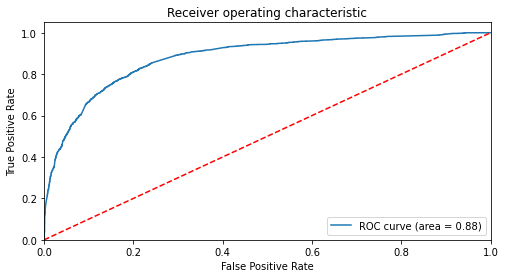

In [46]:
# Calling the roc curve for plotting

edu_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_probability)

In [47]:
# Creating columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_probability.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_probability,ID,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
1871,0,0.257111,1871,1,1,1,0,0,0,0,0,0,0
6795,0,0.224006,6795,1,1,1,0,0,0,0,0,0,0
3516,0,0.333872,3516,1,1,1,1,0,0,0,0,0,0
8105,0,0.833230,8105,1,1,1,1,1,1,1,1,1,0
3934,0,0.173075,3934,1,1,0,0,0,0,0,0,0,0


In [48]:
# Caculating accuracy, sensitivity and specificity with probability cutoffs

# importing necessary library

from sklearn.metrics import confusion_matrix

# Creating a dataframe to store all the values to be created

df_cutoffs=pd.DataFrame(columns=['Probability','Accuracy','Sensitvity','Specificity'])

# from 0 to 0.9 with set size 0.1

var=[0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]   

for i in var:
    cm_matrix=confusion_matrix(y_train_pred_final['Converted'],y_train_pred_final[i])  # creating confusion matrix 
    total=sum(sum(cm_matrix))                                                          # Taking the sum of the matrix
    accuracy=(cm_matrix[0,0]+cm_matrix[1,1])/total                                     # Storing Accuracy Data 
    sensitivity=cm_matrix[1,1]/(cm_matrix[1,0]+cm_matrix[1,1])                         # Storing Sensitivity Data
    specificity=cm_matrix[0,0]/(cm_matrix[0,0]+cm_matrix[0,1])                         # Storing Specificity Data
    df_cutoffs.loc[i]=[i, accuracy, sensitivity, specificity]                          # Inserting all the data into the dataframe created earlier
print(df_cutoffs)   # Printing the data

     Probability  Accuracy  Sensitvity  Specificity
0.0          0.0  0.381262    1.000000     0.000000
0.1          0.1  0.593537    0.965937     0.364068
0.2          0.2  0.760204    0.907137     0.669665
0.3          0.3  0.798083    0.836577     0.774363
0.4          0.4  0.810761    0.766829     0.837831
0.5          0.5  0.813389    0.694647     0.886557
0.6          0.6  0.797001    0.587186     0.926287
0.7          0.7  0.782622    0.513382     0.948526
0.8          0.8  0.758194    0.410787     0.972264
0.9          0.9  0.715213    0.272101     0.988256


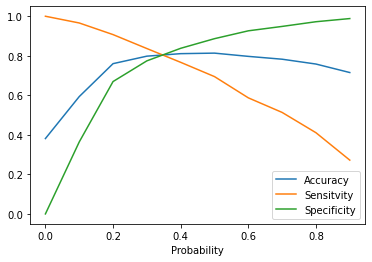

In [49]:
# Ploting 'Accuracy' , 'Sensitivity' and 'Specificity' for various probabilities(0.0 to 0.9).

df_cutoffs.plot.line(x='Probability', y=['Accuracy','Sensitvity','Specificity'])   # line plotting
plt.show()

In [50]:
# Predicting the outcomes with probability cutoff as 0.4 by creating new columns in the final dataset

y_train_pred_final['Predicted']=y_train_pred_final['Converted_probability'].map(lambda x:1 if x >0.4 else 0 )  # Predicted value 

y_train_pred_final.head()

,Converted,Converted_probability,ID,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,Predicted
1871,0,0.257111,1871,1,1,1,0,0,0,0,0,0,0,0
6795,0,0.224006,6795,1,1,1,0,0,0,0,0,0,0,0
3516,0,0.333872,3516,1,1,1,1,0,0,0,0,0,0,0
8105,0,0.833230,8105,1,1,1,1,1,1,1,1,1,0,1
3934,0,0.173075,3934,1,1,0,0,0,0,0,0,0,0,0


# Precision and Recall

In [51]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion

array([[3353,  649],
       [ 575, 1891]])

In [52]:
# Precision = TP / TP + FP
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.7444881889763779

In [53]:
#Recall = TP / TP + FN
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.7668288726682887

### with cutoff of 0.35 precission is 74% and recall is 76% 

# Precision and Recall trade off

In [54]:
from sklearn.metrics import precision_recall_curve

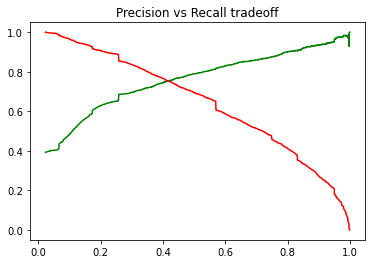

In [55]:
# Creating precision recall curve by crreating three points and plotting

p ,r, thresholds=precision_recall_curve(y_train_pred_final.Converted,y_train_pred_final.Converted_probability)
plt.title('Precision vs Recall tradeoff')
plt.plot(thresholds, p[:-1], "g-")    # Plotting precision
plt.plot(thresholds, r[:-1], "r-")    # Plotting Recall
plt.show()

In [56]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_probability.map(lambda x: 1 if x > 0.41 else 0)
y_train_pred_final.head()

,Converted,Converted_probability,ID,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,Predicted,final_predicted
1871,0,0.257111,1871,1,1,1,0,0,0,0,0,0,0,0,0
6795,0,0.224006,6795,1,1,1,0,0,0,0,0,0,0,0,0
3516,0,0.333872,3516,1,1,1,1,0,0,0,0,0,0,0,0
8105,0,0.833230,8105,1,1,1,1,1,1,1,1,1,0,1,1
3934,0,0.173075,3934,1,1,0,0,0,0,0,0,0,0,0,0


In [57]:
# Accuracy
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8115337043908473

In [58]:
# Creating confusion matrix again
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3381,  621],
       [ 598, 1868]])

In [59]:
# Substituting the value of true positive
TP = confusion2[1,1]
# Substituting the value of true negatives
TN = confusion2[0,0]
# Substituting the value of false positives
FP = confusion2[0,1] 
# Substituting the value of false negatives
FN = confusion2[1,0]

In [60]:
# Precision = TP / TP + FP
TP / (TP + FP)

0.7505022097227803

In [61]:
#Recall = TP / TP + FN
TP / (TP + FN)

0.7575020275750203

### with cutoff 0.41 pression is 75% and recall is 76%

# predicting on test data

In [62]:
# Scalling the variables 'Total Time Spent on Website' with standard scaler and tranforming the X - test dataset

X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']]=scaler.transform(X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])

In [63]:
# Substituting all the columns in the final train model
col = X_train.columns

In [64]:
# Select the columns in X_train for X_test as well
X_test = X_test[col]
# Add a constant to X_test
X_test_sm = sm.add_constant(X_test[col])
X_test_sm
X_test_sm

,const,Do Not Email,TotalVisits,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Welingak Website,Last Activity_Olark Chat Conversation,What is your current occupation_Working Professional,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website
4269,1.0,0,0.031873,0.444982,0,0,0,0,0,0,0,0,0,0
2376,1.0,0,0.000000,0.000000,1,0,0,0,0,0,0,0,0,0
7766,1.0,0,0.019920,0.025968,0,0,0,0,1,0,0,0,0,0
9199,1.0,0,0.000000,0.000000,0,1,0,1,0,0,0,1,0,0
4359,1.0,0,0.000000,0.000000,1,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8649,1.0,0,0.059761,0.127641,0,0,0,0,0,0,0,0,0,1
2152,1.0,0,0.000000,0.000000,1,0,0,0,0,0,0,0,0,0
7101,1.0,0,0.000000,0.000000,0,1,0,0,0,0,1,0,0,0
5331,1.0,1,0.011952,0.707746,0,0,0,0,0,0,0,1,0,0


In [65]:
# Storing prediction of test set in the variable 'y_test_pred'
y_test_pred = res.predict(X_test_sm)
# Coverting it to df
y_pred_df = pd.DataFrame(y_test_pred)
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
# Remove index for both dataframes to append them side by side 
y_pred_df.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)
# Append y_test_df and y_pred_df
y_pred_final = pd.concat([y_test_df, y_pred_df],axis=1)
# Renaming column 
y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})
y_pred_final.head()

,Converted,Conversion_Prob
0,1,0.780390
1,1,0.949399
2,1,0.884459
3,0,0.066283
4,1,0.830979


In [66]:
# Making prediction using cut off 0.35
y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.35 else 0)
y_pred_final

,Converted,Conversion_Prob,final_predicted
0,1,0.780390,1
1,1,0.949399,1
2,1,0.884459,1
3,0,0.066283,0
4,1,0.830979,1
...,...,...,...
2767,0,0.149866,0
2768,1,0.949399,1
2769,0,0.257111,0
2770,0,0.231949,0


In [67]:
# Check the overall accuracy
metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)

0.812049062049062

In [68]:
# Creating confusion matrix 
confusion2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion2

array([[1376,  301],
       [ 220,  875]])

In [69]:
# Substituting the value of true positive
TP = confusion2[1,1]
# Substituting the value of true negatives
TN = confusion2[0,0]
# Substituting the value of false positives
FP = confusion2[0,1] 
# Substituting the value of false negatives
FN = confusion2[1,0]


In [70]:
# Calculating the sensitivity
TP/(TP+FN)

0.7990867579908676

In [71]:
# Calculating the specificity
TN/(TN+FP)

0.8205128205128205

### with cutoff of 0.35 pression is 79% and recall is 82%

In [72]:
# Storing prediction of test set in the variable 'y_test_pred'
y_test_pred = res.predict(X_test_sm)
# Coverting it to df
y_pred_df = pd.DataFrame(y_test_pred)
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
# Remove index for both dataframes to append them side by side 
y_pred_df.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)
# Append y_test_df and y_pred_df
y_pred_final = pd.concat([y_test_df, y_pred_df],axis=1)
# Renaming column 
y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})
y_pred_final.head()

,Converted,Conversion_Prob
0,1,0.780390
1,1,0.949399
2,1,0.884459
3,0,0.066283
4,1,0.830979


In [73]:
# Making prediction using cut off 0.41
y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.41 else 0)
y_pred_final

,Converted,Conversion_Prob,final_predicted
0,1,0.780390,1
1,1,0.949399,1
2,1,0.884459,1
3,0,0.066283,0
4,1,0.830979,1
...,...,...,...
2767,0,0.149866,0
2768,1,0.949399,1
2769,0,0.257111,0
2770,0,0.231949,0


In [74]:
# Check the overall accuracy
metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)

0.8142135642135642

In [75]:
# Creating confusion matrix 
confusion2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion2

array([[1434,  243],
       [ 272,  823]])

In [76]:
# Substituting the value of true positive
TP = confusion2[1,1]
# Substituting the value of true negatives
TN = confusion2[0,0]
# Substituting the value of false positives
FP = confusion2[0,1] 
# Substituting the value of false negatives
FN = confusion2[1,0]

In [77]:
# Precision = TP / TP + FP
TP / (TP + FP)

0.7720450281425891

In [78]:
#Recall = TP / TP + FN
TP / (TP + FN)

0.7515981735159817

### with cuttof of 0.41 precision is 77% and recall is 75%

## we can say that for good conversion rate which leads getting converted are:
Last Notable Activity_Had a Phone Conversation
Lead Origin_Lead Add Form and
What is your current occupation_Working Professional